## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
> →將原資料 進行(x-127.5)/127.5的運算<br> 
> (見資料前處裡section, [3])
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
> →原3層在Epoch約10的時候val_acc開始穩定;<br>
>  而mlp在10層時, Epoch不到10就val_acc開始穩定, 且val_acc也較高
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度
> →未使用GPU加速, 每個Epoch訓練時間約為9-10秒;<br> 
> 使用GPU加速則大幅縮減每個Epoch練時間至1-2秒

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import keras
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
  x = (x-127.5)/127.5
  if flatten:
    x = x.reshape(len(x),-1)
  return x

def preproc_y(y, class_no=10):
  if y.shape[-1] == 1:
    y = keras.utils.to_categorical(y, class_no)
  return y

In [4]:
train_x, train_y = train
test_x, test_y = test

train_x = preproc_x(train_x)
test_x = preproc_x(test_x)

train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp_3(input_shape, output_units=10, num_neurons=[512, 256, 128]):
  input_layer = keras.layers.Input(input_shape)
  for i, num in enumerate(num_neurons):
    if i == 0:
      x = keras.layers.Dense(units=num, activation="relu", name="hidden_layer_"+str(i+1))(input_layer)
    else:
      x = keras.layers.Dense(units=num, activation="relu", name="hidden_layer_"+str(i+1))(x)
  
  out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
  
  model = keras.models.Model(inputs=[input_layer], outputs=[out])

  return model


def build_mlp_10(input_shape, output_units=10, num_neurons=[1024, 1024, 1024, 512, 512, 512, 256, 256, 128, 128]):
  input_layer = keras.layers.Input(input_shape)
  for i, num in enumerate(num_neurons):
    if i == 0:
      x = keras.layers.Dense(units=num, activation="relu", name="hidden_layer_"+str(i+1))(input_layer)
    else:
      x = keras.layers.Dense(units=num, activation="relu", name="hidden_layer_"+str(i+1))(x)
  
  out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
  
  model = keras.models.Model(inputs=[input_layer], outputs=[out])

  return model


In [6]:
train_x.shape[1:]

(3072,)

In [7]:
model = build_mlp_3(input_shape=train_x.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256


optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


model.fit(train_x, train_y, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(test_x, test_y), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 7ms/step - loss: 1.8398 - accuracy: 0.3460 - val_loss: 1.5376 - val_accuracy: 0.4511
Epoch 2/100
196/196 [==============================] - 1s 5ms/step - loss: 1.4616 - accuracy: 0.4824 - val_loss: 1.4930 - val_accuracy: 0.4746
Epoch 3/100
196/196 [==============================] - 1s 5ms/step - loss: 1.3365 - accuracy: 0.5281 - val_loss: 1.4042 - val_accuracy: 0.5044
Epoch 4/100
196/196 [==============================] - 1s 5ms/step - loss: 1.2354 - accuracy: 0.5650 - val_loss: 1.3970 - val_accuracy: 0.5090
Epoch 5/100
196/196 [==============================] - 1s 5ms/step - loss: 1.1408 - accuracy: 0.6014 - val_loss: 1.3720 - val_accuracy: 0.5169
Epoch 6/100
196/196 [==============================] - 1s 5ms/step - loss: 1.0518 - accuracy: 0.6327 - val_loss: 1.3752 - val_accuracy: 0.5290
Epoch 7/100
196/196 [==============================] - 1s 5ms/step - loss: 0.9708 - accuracy: 0.6606 - val_loss: 1.3910 - val_accuracy: 0.5332

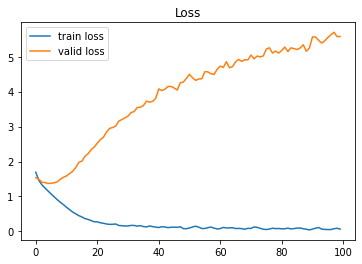

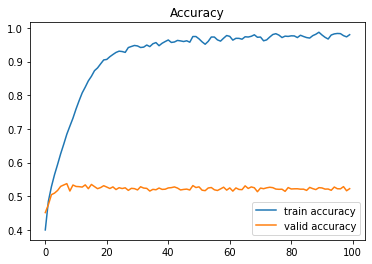

In [9]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
model2 = build_mlp_10(input_shape=train_x.shape[1:])
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 1024)              3146752   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 1024)              1049600   
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 1024)              1049600   
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 512)               524800    
_________________________________________________________________
hidden_layer_5 (Dense)       (None, 512)               262656    
_________________________________________________________________
hidden_layer_6 (Dense)       (None, 512)               2626

In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256


optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


model2.fit(train_x, train_y, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(test_x, test_y), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 9ms/step - loss: 1.9328 - accuracy: 0.2922 - val_loss: 1.6094 - val_accuracy: 0.4246
Epoch 2/100
196/196 [==============================] - 1s 7ms/step - loss: 1.5689 - accuracy: 0.4419 - val_loss: 1.4823 - val_accuracy: 0.4737
Epoch 3/100
196/196 [==============================] - 1s 7ms/step - loss: 1.4175 - accuracy: 0.4987 - val_loss: 1.4318 - val_accuracy: 0.5021
Epoch 4/100
196/196 [==============================] - 1s 7ms/step - loss: 1.3072 - accuracy: 0.5397 - val_loss: 1.4138 - val_accuracy: 0.5138
Epoch 5/100
196/196 [==============================] - 1s 7ms/step - loss: 1.2043 - accuracy: 0.5801 - val_loss: 1.3845 - val_accuracy: 0.5180
Epoch 6/100
196/196 [==============================] - 1s 7ms/step - loss: 1.1024 - accuracy: 0.6118 - val_loss: 1.3759 - val_accuracy: 0.5333
Epoch 7/100
196/196 [==============================] - 1s 7ms/step - loss: 1.0310 - accuracy: 0.6370 - val_loss: 1.3822 - val_accuracy: 0.5377

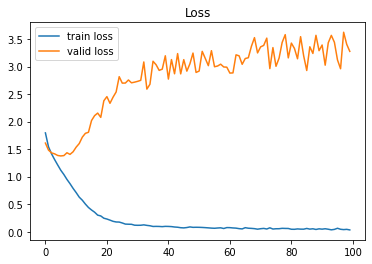

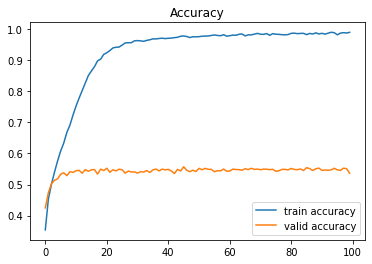

In [12]:
import matplotlib.pyplot as plt


train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["accuracy"]
valid_acc = model2.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()